# Classifier Selection

In [2]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
clean_spacy_mapaffil = pd.read_parquet("data/clean_spacy_mapaffil.parquet", engine="fastparquet") 

In [22]:
accuracy_data = []

for classifier in (svm.LinearSVC(dual=True), RandomForestClassifier(), LogisticRegression(), MultinomialNB()): 
    
    for training_size in ([1000, 5000, 10000]): 

        start_iter_time = time.time()

        clean_spacy_mapaffil_subset = clean_spacy_mapaffil.head(training_size)

        affiliation_info =  list(clean_spacy_mapaffil_subset['affiliation']) 
        cities = list(clean_spacy_mapaffil_subset['city']) 

        X_train = affiliation_info
        y_train = cities

        test_sample = clean_spacy_mapaffil.head(50000).sample(n=1000, random_state=42) 
        X_test = list(test_sample['affiliation'])
        y_test = list(test_sample['city'])

        vectorizer = TfidfVectorizer(stop_words="english", decode_error="ignore")
        vectorizer.fit(X_train)

        features_train = vectorizer.transform(X_train)
        features_test = vectorizer.transform(X_test)

        classifier.fit(features_train, y_train)    

        y_pred = classifier.predict(features_test)

        end_iter_time = time.time()  

        iter_time = (end_iter_time - start_iter_time) / 60 

        accuracy_data.append([training_size, accuracy_score(y_test, y_pred), len(y_test), str(classifier), iter_time])

        print(f"Completed Training Size of {training_size} for {str(classifier)}, Iter Minutes: {iter_time}")

accuracy_results = pd.DataFrame(accuracy_data, columns=['Training_Size', 'Accuracy', 'Test_Size', 'Classifier', 'Time_Minutes'])

Completed Training Size of 1000 for LinearSVC(dual=True), Iter Minutes: 0.004254154364267985
Completed Training Size of 5000 for LinearSVC(dual=True), Iter Minutes: 0.032976766427357994
Completed Training Size of 10000 for LinearSVC(dual=True), Iter Minutes: 0.08312158187230428
Completed Training Size of 1000 for RandomForestClassifier(), Iter Minutes: 0.014782881736755371
Completed Training Size of 5000 for RandomForestClassifier(), Iter Minutes: 0.1220172127087911
Completed Training Size of 10000 for RandomForestClassifier(), Iter Minutes: 0.31019326448440554
Completed Training Size of 1000 for LogisticRegression(), Iter Minutes: 0.018161495526631672
Completed Training Size of 5000 for LogisticRegression(), Iter Minutes: 0.18796343008677166
Completed Training Size of 10000 for LogisticRegression(), Iter Minutes: 0.47881853183110556
Completed Training Size of 1000 for MultinomialNB(), Iter Minutes: 0.0007008035977681478
Completed Training Size of 5000 for MultinomialNB(), Iter Minutes

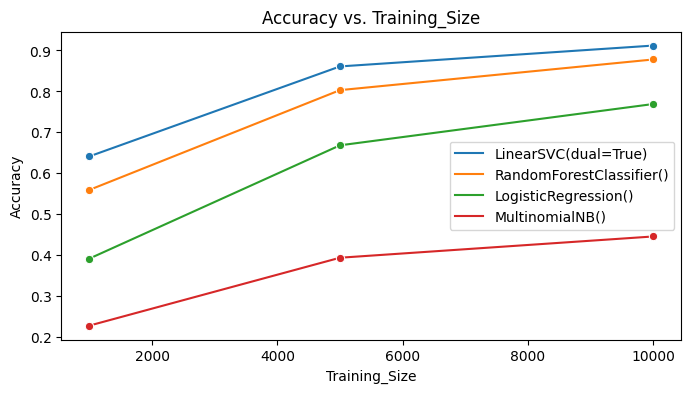

,Training_Size,Accuracy,Test_Size,Classifier,Time_Minutes
0,10000,0.912,1000,LinearSVC(dual=True),0.083122
1,10000,0.878,1000,RandomForestClassifier(),0.310193
2,10000,0.769,1000,LogisticRegression(),0.478819
3,10000,0.445,1000,MultinomialNB(),0.005535


In [23]:
plt.figure(figsize=(8, 4)) 

ax1 = sns.lineplot(data=accuracy_results, x='Training_Size', y='Accuracy', hue='Classifier', marker='o')

plt.xlabel('Training_Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training_Size')
plt.legend()

pdf_filename = 'classifier_selection.pdf'
plt.savefig(pdf_filename, dpi=300, bbox_inches='tight')

plt.show()

df_sorted = accuracy_results.sort_values(by='Training_Size', ascending=False)

df_result = df_sorted.drop_duplicates(subset='Classifier', keep='first')

df_result = df_result.sort_values(by='Accuracy', ascending=False)

df_result = df_result.reset_index(drop=True)

display(df_result)

In [ ]:
accuracy_data = []

for classifier in (svm.LinearSVC(dual=True), RandomForestClassifier(), LogisticRegression(), MultinomialNB()): 

    for vectorizer in (TfidfVectorizer(stop_words="english", decode_error="ignore"), CountVectorizer(stop_words="english", decode_error="ignore")):
    
        for training_size in ([10000]): 

            start_iter_time = time.time()

            clean_spacy_mapaffil_subset = clean_spacy_mapaffil.head(training_size)

            affiliation_info =  list(clean_spacy_mapaffil_subset['affiliation']) 
            cities = list(clean_spacy_mapaffil_subset['city']) 

            X_train = affiliation_info
            y_train = cities

            test_sample = clean_spacy_mapaffil.head(50000).sample(n=1000, random_state=42) 
            X_test = list(test_sample['affiliation'])
            y_test = list(test_sample['city'])

            vectorizer.fit(X_train)

            features_train = vectorizer.transform(X_train)
            features_test = vectorizer.transform(X_test)

            classifier.fit(features_train, y_train)    

            y_pred = classifier.predict(features_test)

            end_iter_time = time.time()  

            iter_time = (end_iter_time - start_iter_time) / 60 

            accuracy_data.append([str(classifier), str(vectorizer), round(accuracy_score(y_test, y_pred), 2), round(f1_score(y_test, y_pred, average='weighted'), 2), training_size, len(y_test)])

            print(f"Completed Training Size of {training_size} for {str(classifier)}, Iter Minutes: {iter_time}")

accuracy_results = pd.DataFrame(accuracy_data, columns=['Classifier', 'Vectorizer', 'Accuracy', 'F-1', 'Training Size', 'Test Size'])

In [ ]:
replacement_dict = {"LinearSVC(dual=True)": 'Linear SVC', "RandomForestClassifier()": 'Random Forest', "LogisticRegression()": 'Logistic Regression', "MultinomialNB()": 'Multinomial Naive Bayes', "TfidfVectorizer(decode_error='ignore', stop_words='english')": 'TF-IDF', "CountVectorizer(decode_error='ignore', stop_words='english')": 'BoW'}
accuracy_results['Classifier'] = accuracy_results['Classifier'].replace(replacement_dict)
accuracy_results['Vectorizer'] = accuracy_results['Vectorizer'].replace(replacement_dict)

accuracy_results = accuracy_results.sort_values(by='Vectorizer', ascending=False)

display(accuracy_results)